In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials   

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
from google.colab import drive
drive.mount('/content/ym')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/ym


In [ ]:
# memory footprint support libraries/code

!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

# XXX: only one GPU on Colab and isn’t guaranteed

gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=09615367201598449c6f6db3c24229e38853e7e2fe179b52520cc396a69e0cdb
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  | Proc size: 123.4 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [ ]:
# clone darknet repo

!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14285, done.
remote: Total 14285 (delta 0), reused 0 (delta 0), pack-reused 14285
Receiving objects: 100% (14285/14285), 12.84 MiB | 4.81 MiB/s, done.
Resolving deltas: 100% (9745/9745), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled

%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA

!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)

!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

**Copy some files here **


yolo-custom(mask)/cfg  to darknet/cfg

1.   obj.names, obj.data, train.txt, test.txt to darknet/data

1.   darknet53.conv.74 to darknet

1.   obj folder to darknet/data/obj (create obj folder)









In [ ]:
import shutil,glob

Copy images and lables from drive to darknet/data/obj

In [ ]:

s = '/content/ym/My Drive/Colab Notebooks/CV/Mask detection/Mask'
d = '/content/darknet/data/obj'

if os.path.isdir(s) and os.path.isdir(d) :
        
        for filePath in glob.glob(s + '/*'):
            
            shutil.copy(filePath, d);
else:
        print("srcDir & dstDir should be Directories")

Copy the darknet53 file from drive to here

In [ ]:

shutil.copy('/content/ym/My Drive/Colab Notebooks/CV/Mask detection/darknet53.conv.74', '/content/darknet')

'/content/darknet/darknet53.conv.74'

In [ ]:
#check all files are imported successfully not.
import os

path, dirs, files = next(os.walk("/content/darknet/data/obj"))
file_count = len(files)
print(file_count)

1682


to avoid colab 30/90 mins interruption



In [ ]:


'''
function ClickConnect(){

console.log("Working");

document.querySelector("colab-toolbar-button#connect").click()

}

setInterval(ClickConnect,60000)'''


'\nfunction ClickConnect(){\n\nconsole.log("Working");\n\ndocument.querySelector("colab-toolbar-button#connect").click()\n\n}\n\nsetInterval(ClickConnect,60000)'

train the model with our dataset

In [ ]:

!./darknet detector train ./data/obj.data ./cfg/yolov4_ym.cfg ./darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
Loaded: 0.000044 seconds
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.275418, GIOU: 0.091199), Class: 0.888991, Obj: 0.000022, No Obj: 0.000072, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.526969, iou_loss = 5.447891, total_loss = 5.974860 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.549397, GIOU: 0.531004), Class: 0.521018, Obj: 0.004319, No Obj: 0.000592, .5R: 0.500000, .75R: 0.000000, count: 8, class_loss = 6.820974, iou_loss = 2.695056, total_loss = 9.516030 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.656139, GIOU: 0.625906), Class: 0.710448, Obj: 0.243956, No Obj: 0.007919, .5R: 0.933333, .75R: 0.133333, count: 15, class_loss = 7.998812, iou_loss = 2.456592, total_loss = 10.455403 
 total_bbox = 272535, rewritten_bbox = 0.098703 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.406287, GIOU: 0.345966), Class: 0.

Save the trained weight to drive

In [ ]:

shutil.copy('/content/darknet/backup/yolov4_ym_last.weights', '/content/ym/My Drive/Colab Notebooks/CV/Mask detection/Weights')

'/content/ym/My Drive/Colab Notebooks/CV/Mask detection/Weights/yolov4_ym_1000.weights'

In [ ]:
# define helper functions

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
 
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
 

  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  

  plt.show()

# use this to upload files

def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)


# use this to download a file 
 
def download(path):
  from google.colab import files
  files.download(path)

Load the pre trained weight from drive to here

In [ ]:

shutil.copy('/content/ym/My Drive/Colab Notebooks/CV/Mask detection/Weights/yolov4_ym_last.weights', '/content/darknet/backup')

'/content/darknet/backup/yolov4_ym_last.weights'


Running detection on image file

In [ ]:
!./darknet detect /content/darknet/cfg/yolov4_ym.cfg /content/darknet/backup/yolov4_ym_last.weights /content/darknet/data/4.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304

Show the predicted result for image

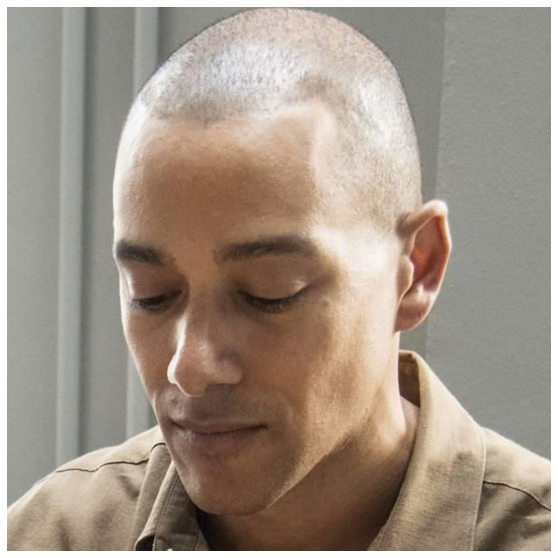

In [ ]:
imShow('predictions.jpg')

Upload a video file for detection

In [ ]:
upload()

Saving VID_20200904_131418.mp4 to VID_20200904_131418.mp4
saved file VID_20200904_131418.mp4


Running detection on video file

In [ ]:
!./darknet detector demo /content/darknet/data/obj.data cfg/yolov4_ym.cfg /content/darknet/backup/yolov4_ym_last.weights -thresh 0.6 -dont_show VID_20200904_131418.mp4 -i 0 -out_filename results.mp4

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->

Download the predicted video file

In [ ]:

download('results.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>